In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, interpolate
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error

from data_loader import load_pickle, unpack_data
sns.set()

N_SUBJECTS = 2

In [2]:
datasets = []
for i in range(1, N_SUBJECTS + 1):
    datasets.append(load_pickle(i))

<ipython-input-70-b6b024bcad2b>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t_ppg, f_ppg, Sxx_ppg_clipped, shading='flat')


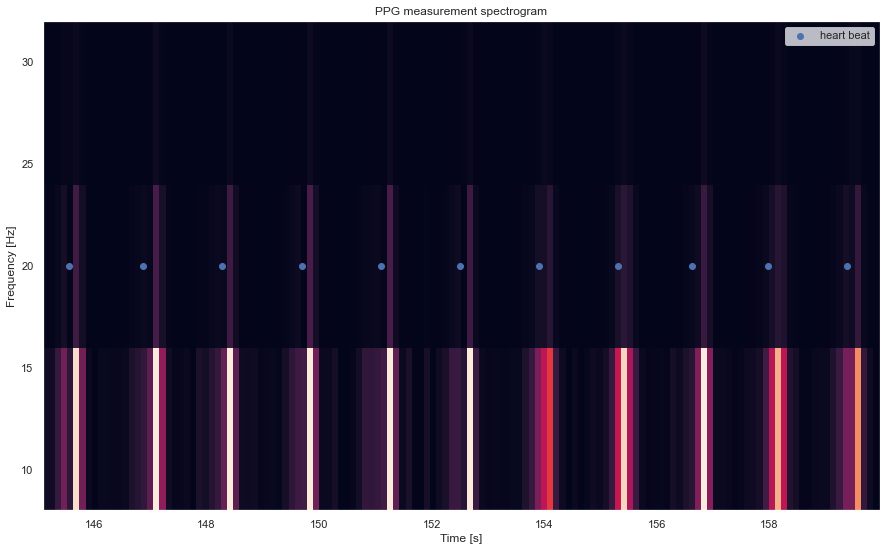

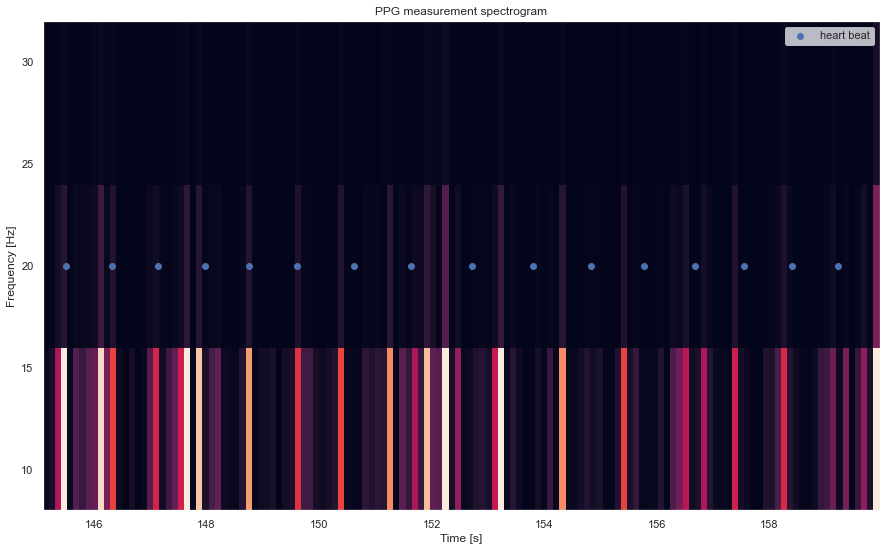

In [70]:
acc_threshold_percentile = 90
distances_default_value = 1

fs_ppg = 64
fs_acc = 32
nperseg_ppg = 8
noverlap = None

distances_list = []
activity_list = []

for dataset in datasets:

    ppg, _, hr, activity, rpeaks = unpack_data(dataset)

    hr_timestamps = np.arange(0, len(hr) * 2, 2)
    hr_interpolation = interpolate.interp1d(hr_timestamps, hr)
    rpeaks_s = rpeaks / 700
    
    ### create spectrograms
    f_ppg, t_ppg, Sxx_ppg = signal.spectrogram(ppg, fs_ppg, nperseg=nperseg_ppg, noverlap=noverlap)
    
    ### keep only frequencies of interest
    fmin = 8 # Hz
    fmax = 32 # Hz

    freq_slice_ppg = np.where((f_ppg >= fmin) & (f_ppg <= fmax))
    f_ppg = f_ppg[freq_slice_ppg]
    Sxx_ppg = Sxx_ppg[freq_slice_ppg,:][0]
    
    ### keep only times of interest
    tmin = 145 # s
    tmax = 160 # s
    
    time_slice_ppg = np.where((t_ppg >= tmin) & (t_ppg <= tmax))
    t_ppg = t_ppg[time_slice_ppg]
    Sxx_ppg = Sxx_ppg[:, time_slice_ppg][:, 0, :]
    rpeaks_s = rpeaks_s[(rpeaks_s >= tmin) & (rpeaks_s <= tmax)]
    
    ### clip spectrograms
    Sxx_ppg_clipped = np.clip(Sxx_ppg, 0, np.percentile(Sxx_ppg.flatten(), 99))

    ### plot ppg spectrogram
    plt.figure(figsize=(15, 9))
    plt.pcolormesh(t_ppg, f_ppg, Sxx_ppg_clipped, shading='flat')
    plt.title('PPG measurement spectrogram')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    
    ### plot heart beats
    
    plt.scatter(rpeaks_s, [(fmax + fmin) / 2] * len(rpeaks_s), label='heart beat')
    plt.legend()
    
    

